<a href="https://colab.research.google.com/github/classy-classifiers/cassava-classification/blob/main/EDA_(Classy_Classifiers).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***mounting to shared gogle drive***

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import json
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import PIL.Image
from scipy.stats import skew
import seaborn as sns
from tqdm.notebook import tqdm

In [ ]:
# credentials
FILEPATH = '/content/drive/Shareddrives/2040_Midterm_Project/Classy_Classifiers/data/'

# list of image file names
train_imgs_dir = os.path.join(FILEPATH, 'train_images')
img_names = os.listdir(train_imgs_dir)

In [ ]:
# file mapping image file names to encoded labels
labels_df = pd.read_csv(FILEPATH + 'train.csv')

# dictionary mapping encoded labels to disease classifications
with open(os.path.join(FILEPATH, 'label_num_to_disease_map.json')) as json_file: 
    labels_map = json.load(json_file)

In [ ]:
# convert keys to integers for compatibility with labels_df['label']
labels_map = {int(k):v for k,v in labels_map.items()}
labels_map

{0: 'Cassava Bacterial Blight (CBB)',
 1: 'Cassava Brown Streak Disease (CBSD)',
 2: 'Cassava Green Mottle (CGM)',
 3: 'Cassava Mosaic Disease (CMD)',
 4: 'Healthy'}

In [ ]:
labels_map_short = {0: 'CBB', 1: 'CBSD', 2: 'CGM', 3: 'CMD', 4: 'Healthy'}

In [ ]:
# replace encoded labels with disease classifications
labels_df = labels_df.replace({"label": labels_map_short})
labels_df.head()

,image_id,label
0,1000015157.jpg,CBB
1,1000201771.jpg,CMD
2,100042118.jpg,CBSD
3,1000723321.jpg,CBSD
4,1000812911.jpg,CMD


In [ ]:
bar_df = labels_df['label'].value_counts(normalize=True)
bar_df

CMD        0.614946
Healthy    0.120437
CGM        0.111511
CBSD       0.102304
CBB        0.050802
Name: label, dtype: float64

## Plot 1: Disease Class Relative Frequencies


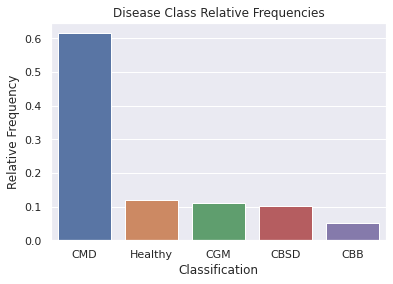

In [ ]:
sns.set_theme(style="darkgrid")
ax = sns.barplot(x=bar_df.index, y=bar_df)
ax.set_title('Disease Class Relative Frequencies')
ax.set_ylabel('Relative Frequency')
ax.set_xlabel('Classification')
print()

## Plot 2: Raw comparison of images

In [ ]:
# function to extract image array from name

def image_array(name):
  path = os.path.join(train_imgs_dir, name)
  img = PIL.Image.open(path)
  return np.array(img)

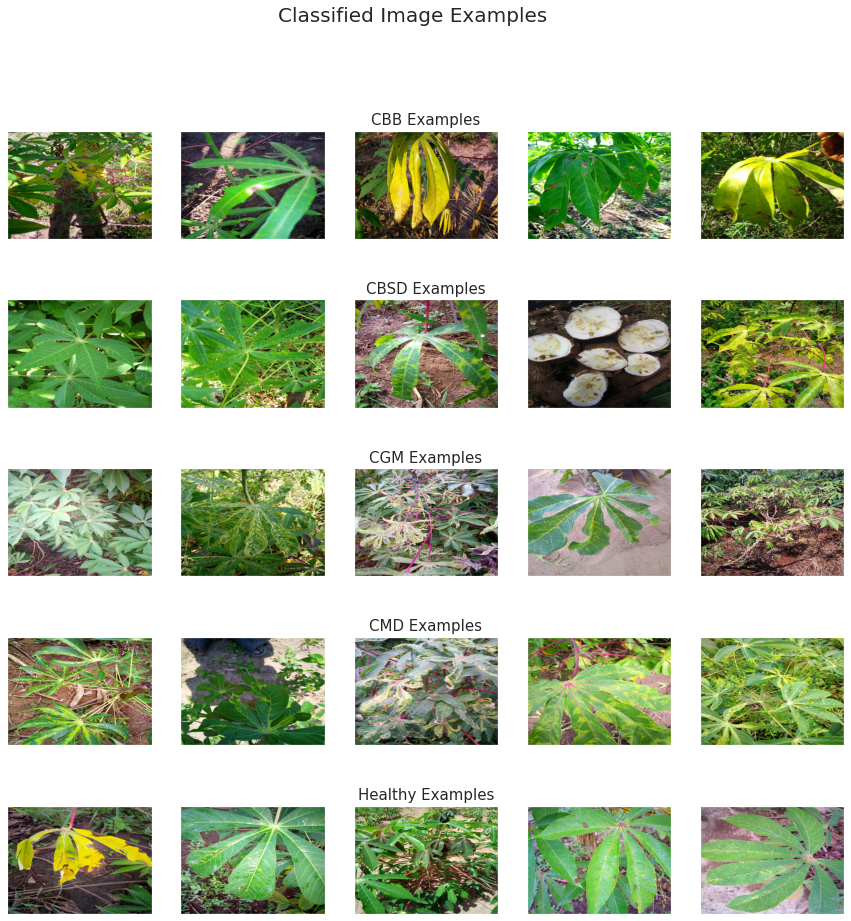

In [ ]:
fig, axs = plt.subplots(5, 5, figsize=(15,15))
fig.suptitle("Classified Image Examples", fontsize=20)

for i, label_name in enumerate(labels_map_short.values()):
  
  img_series = labels_df[labels_df['label'] == label_name]['image_id']
  img_series.reset_index(inplace=True, drop=True)

  for j in range(5):

    img_name = img_series[j]
    # print(f"img name: {img_name}, plot: {(i, j)}, class: {label_name}")
    img = image_array(img_name)

    axs[i, j].imshow(img)
    axs[i, j].grid(False)
    axs[i, j].set_xticks([])
    axs[i, j].set_yticks([])
    if j == 2:
      axs[i, j].set_title(f"{label_name} Examples", fontsize=15)

### Load in training images

In [ ]:
# REDEFININGS LABELS_DF TO HAVE CLASS NUMBER INSTEAD OF TEXT NAME
labels_df = pd.read_csv(FILEPATH + 'train.csv')

with open(FILEPATH + 'label_num_to_disease_map.json') as json_file: 
    labels_map = json.load(json_file)

In [ ]:
# redefining images path variable
IMGPATH = FILEPATH + 'train_images/'

import os
import PIL.Image

def collect_train_imgs_and_labels(folder):
    # pull in the data as a list of tuples:
    # (image, label), we'll unzip after
    images = []
    for filename in os.listdir(folder):
        img = PIL.Image.open(os.path.join(folder,filename))
        if img is not None:
            label = int(labels_df[labels_df['image_id'] == filename]['label'])
            images.append((np.array(img), label))
    return np.array(images)

In [ ]:
np.array(PIL.Image.open(IMGPATH+os.listdir(IMGPATH)[0])).shape

(600, 800, 3)

### Loading in random sample of 500 training images

In [ ]:
# going to store 500 randomly samples images for EDA on the images directly
import random 

# we fix the random seed for reproducability
random.seed(42)

# get random indeces that will be our sample training images
rand_inds = random.sample(range(len(os.listdir(IMGPATH))), 500)

# lists of ndarray images and labels that will be accumulated
sample_imgs = []
sample_labels = []

for ind in rand_inds:
    filename = os.listdir(IMGPATH)[ind]
    img = PIL.Image.open(os.path.join(IMGPATH,filename))
    if img is not None:
        label = int(labels_df[labels_df['image_id'] == filename]['label'])
        sample_imgs.append(np.array(img))
        sample_labels.append(label)

In [ ]:
print(len(sample_imgs))
print(sample_imgs[0])
print(sample_imgs[0].shape)
print(len(sample_labels))
print(sample_labels[0])

500
[[[ 49  52  41]
  [ 44  47  38]
  [ 36  37  29]
  ...
  [126 131  99]
  [123 128  96]
  [123 128  96]]

 [[ 57  60  49]
  [ 51  54  45]
  [ 42  43  35]
  ...
  [134 137 106]
  [131 136 104]
  [131 136 104]]

 [[ 61  64  53]
  [ 57  58  50]
  [ 49  50  42]
  ...
  [134 138 105]
  [132 136 103]
  [130 134 101]]

 ...

 [[ 24  41   9]
  [ 23  40   8]
  [ 24  39   8]
  ...
  [ 57  51  19]
  [ 53  48  18]
  [ 49  46  15]]

 [[ 20  37   5]
  [ 20  37   5]
  [ 21  36   5]
  ...
  [ 44  35   6]
  [ 40  33   5]
  [ 37  31   5]]

 [[ 18  35   3]
  [ 18  35   3]
  [ 19  34   3]
  ...
  [ 36  24   0]
  [ 33  23   0]
  [ 29  21   0]]]
(600, 800, 3)
500
3


***Datafram for mean and standard deviation of the pixel values in each image***

columns: mean, std, class_num, class_name

In [ ]:
# build dataframe with cols for mean, std, class label, and class name
sample_pixel_dists = pd.DataFrame(columns=('mean', 'std', 'class_num', 'class_name'))

for i in range(len(sample_imgs)):
    sample_pixel_dists.loc[i] = [sample_imgs[i].mean(), sample_imgs[i].std(),
                                 sample_labels[i], labels_map[str(sample_labels[i])]]

In [ ]:
sample_pixel_dists.head()

,mean,std,class_num,class_name
0,108.598162,58.458533,3,Cassava Mosaic Disease (CMD)
1,88.314497,63.108157,3,Cassava Mosaic Disease (CMD)
2,133.762736,53.379539,4,Healthy
3,99.578619,60.831668,3,Cassava Mosaic Disease (CMD)
4,78.387073,59.600952,3,Cassava Mosaic Disease (CMD)


## Plot 3: Scatterplot (mean pixel val./std. pixel val.)

Text(0.5, 1.0, 'Pixel value distribution')

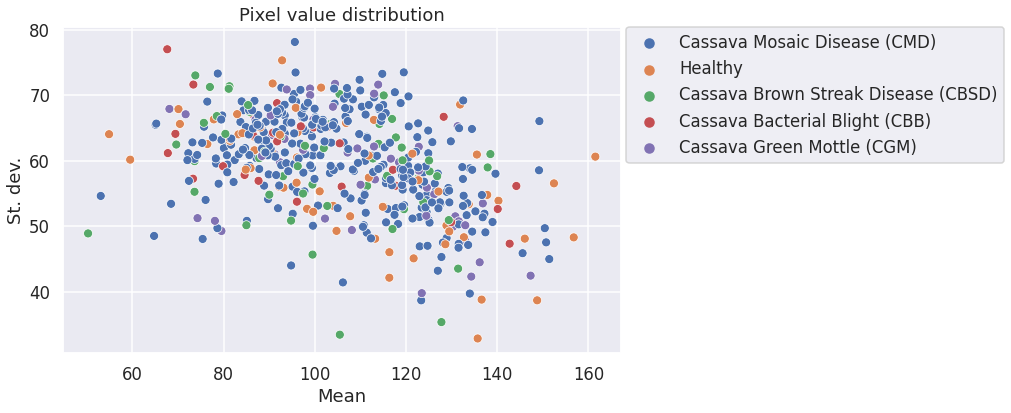

In [ ]:
# import seaborn as sns

sns.set_context("talk")
plt.figure(figsize=(10,6))
sns.scatterplot(data=sample_pixel_dists, x="mean", y="std", hue="class_name")
plt.xlabel("Mean")
plt.ylabel("St. dev.")
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.title("Pixel value distribution")
# plt.savefig("sample_img_pixel_dist.png", format='png',dpi=150)

## Plot 4: Boxplot (pixel val. mean)

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Pixel value mean')

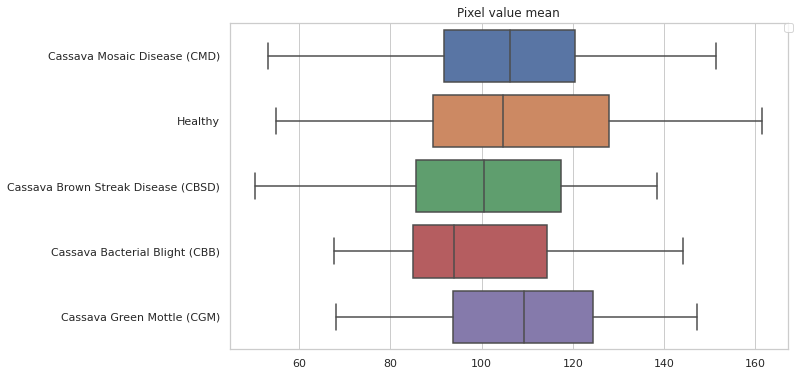

In [ ]:
plt.figure(figsize=(10,6))
sns.set_theme(style="whitegrid")
g1 = sns.boxplot(data=sample_pixel_dists, y="class_name", x="mean", orient="h")
g1.set(xlabel=None)
g1.set(ylabel=None)
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.title("Pixel value mean")
# plt.savefig("sample_img_st_boxplot.png", format='png',dpi=150)

## Plot 5: Boxplot (pixel val. st. dev.)

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Pixel value standard deviation')

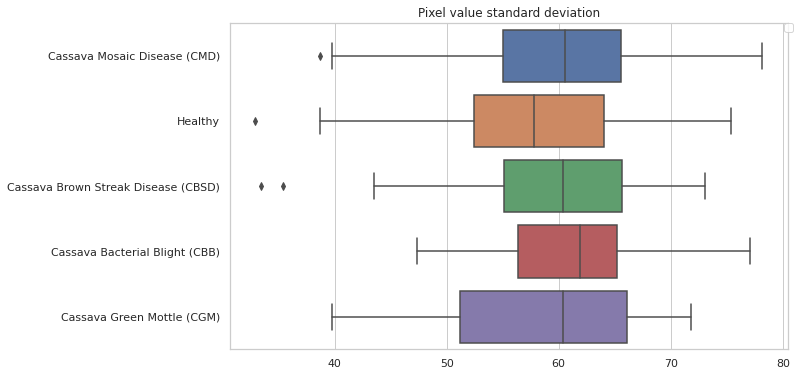

In [ ]:
plt.figure(figsize=(10,6))
sns.set_theme(style="whitegrid")
g1 = sns.boxplot(data=sample_pixel_dists, y="class_name", x="std", orient="h")
g1.set(xlabel=None)
g1.set(ylabel=None)
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.title("Pixel value standard deviation")
# plt.savefig("sample_img_st_boxplot.png", format='png',dpi=150)

## Examples from each class of a sample near the mean, and a sample very far from the mean 
***(in terms of avg. pixel value)***

In [ ]:
# going to add column giving the filename
sample_pixel_dists['filename'] = pd.Series([os.listdir(IMGPATH)[i] for i in rand_inds])
sample_pixel_dists.head()

,mean,std,class_num,class_name,filename
0,108.598162,58.458533,3,Cassava Mosaic Disease (CMD),1029778366.jpg
1,88.314497,63.108157,3,Cassava Mosaic Disease (CMD),4080805940.jpg
2,133.762736,53.379539,4,Healthy,976138379.jpg
3,99.578619,60.831668,3,Cassava Mosaic Disease (CMD),3358660933.jpg
4,78.387073,59.600952,3,Cassava Mosaic Disease (CMD),3540765435.jpg


### ***Looping through the five classes looking at a typical and atypical example from each***

- typical example: the sample within the class whose average pixel value is the closest to the class-wide average
- atypical example: the sample whose average pixel value is the farthest from the class-wide average

In [ ]:
# going to store each of these in a dictionary
# keyed on the class name:
# d[class] = [mean image, outlier image]
example_images = {}

# loop over each class name
for class_name in list(sample_pixel_dists.class_name.unique()):
    example_images[class_name] = []

    # list of means for samples in class
    class_subset = sample_pixel_dists[sample_pixel_dists["class_name"] == class_name]
    class_subset_mean = class_subset["mean"]

    # list centered by subtracting off the mean and taking the abs val
    class_subset_mean_centered = np.abs(class_subset_mean - class_subset_mean.mean())

    # element closest to the mean:
    closest_ind = np.argmin(class_subset_mean_centered)
    print("Sample from class",class_name,"closest to the mean: ")
    print(class_subset["filename"].iloc[closest_ind])
    example_images[class_name].append(class_subset["filename"].iloc[closest_ind])

    # element farthest from the mean:
    farthest_ind = np.argmax(class_subset_mean_centered)
    print("Sample from class",class_name,"farthest from the mean: ")
    print(class_subset["filename"].iloc[farthest_ind])
    example_images[class_name].append(class_subset["filename"].iloc[farthest_ind])

    print()

Sample from class Cassava Mosaic Disease (CMD) closest to the mean: 
3259397427.jpg
Sample from class Cassava Mosaic Disease (CMD) farthest from the mean: 
3793595797.jpg

Sample from class Healthy closest to the mean: 
3833349143.jpg
Sample from class Healthy farthest from the mean: 
3170246612.jpg

Sample from class Cassava Brown Streak Disease (CBSD) closest to the mean: 
1203115878.jpg
Sample from class Cassava Brown Streak Disease (CBSD) farthest from the mean: 
687693766.jpg

Sample from class Cassava Bacterial Blight (CBB) closest to the mean: 
617651411.jpg
Sample from class Cassava Bacterial Blight (CBB) farthest from the mean: 
3346469766.jpg

Sample from class Cassava Green Mottle (CGM) closest to the mean: 
3267685049.jpg
Sample from class Cassava Green Mottle (CGM) farthest from the mean: 
2540204490.jpg



*... and we can plot them*

Cassava Mosaic Disease (CMD) : sample with near mean, sample far from mean


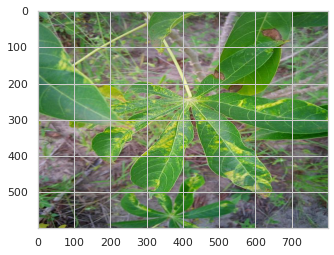

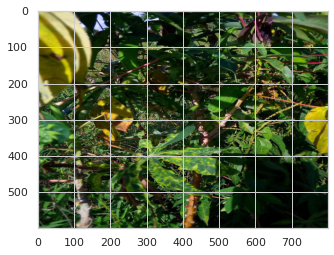

Healthy : sample with near mean, sample far from mean


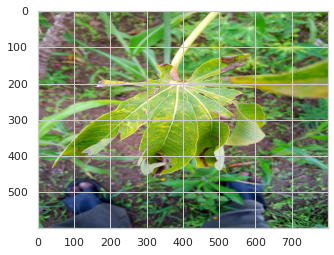

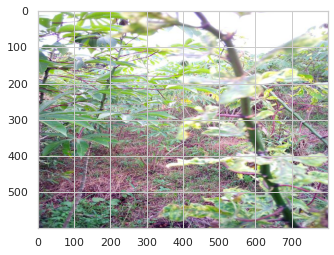

Cassava Brown Streak Disease (CBSD) : sample with near mean, sample far from mean


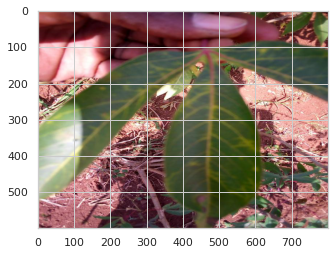

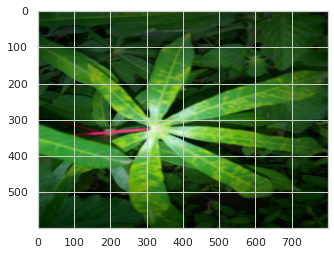

Cassava Bacterial Blight (CBB) : sample with near mean, sample far from mean


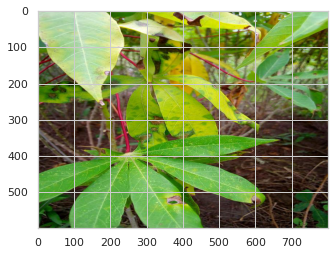

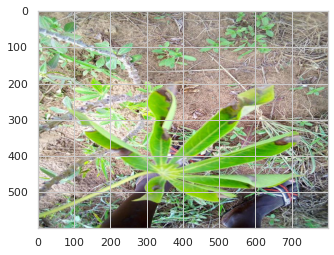

Cassava Green Mottle (CGM) : sample with near mean, sample far from mean


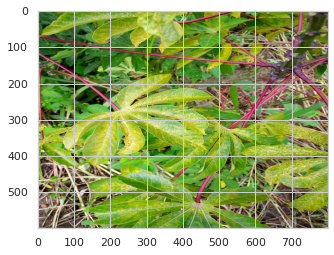

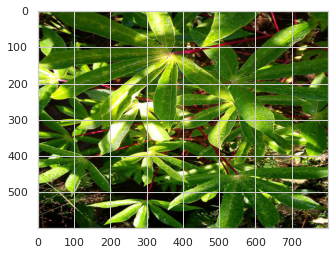

In [ ]:
for class_name in example_images.keys():
    print(class_name,": sample with near mean, sample far from mean")
    for img_file in example_images[class_name]:
        im = PIL.Image.open(os.path.join(IMGPATH,img_file))
        plt.imshow(im)
        plt.show()

## Metadata Analysis DataFrame
Source: https://www.kaggle.com/fireheart7/cassava-metadata-preparation?scriptVersionId=47307838

In [ ]:
# CODE RUN PREVIOUSLY, BELOW WE LOAD IN THIS DATA FROM MEMORY

# def prepare_metadata(img_names): 
#   stats_df = pd.DataFrame(index = np.arange(len(img_names)), 
#                           columns = ["image_name", "path", "rows",                                                                                     
#                                      "columns", "image_mean", "image_sd", 
#                                      "image_skewness", "mean_red_value", 
#                                      "mean_green_value", "mean_blue_value"])

#   i = 0 
#   for img_name in tqdm(img_names) :
#     img = image_array(img_name)
    
#     stats_df.iloc[i]["image_name"] = img_name
#     stats_df.iloc[i]["rows"] = img.shape[0]
#     stats_df.iloc[i]["columns"] = img.shape[1]
#     stats_df.iloc[i]["image_mean"] = np.mean(img.flatten())
#     stats_df.iloc[i]["image_sd"] = np.std(img.flatten())
#     stats_df.iloc[i]["image_skewness"] = skew(img.flatten())
#     stats_df.iloc[i]["mean_red_value"] = np.mean(img[:, :, 0])
#     stats_df.iloc[i]["mean_green_value"] = np.mean(img[:, :, 1])
#     stats_df.iloc[i]["mean_blue_value"] = np.mean(img[:, :, 2])
#     # stats_df.iloc[i]["std_red_value"] = np.std(img[:, :, 0])
#     # stats_df.iloc[i]["std_green_value"] = np.std(img[:, :, 1])
#     # stats_df.iloc[i]["std_blue_value"] = np.std(img[:, :, 2])
#     # stats_df.iloc[i]["skew_red_value"] = skew(img[:, :, 0])
#     # stats_df.iloc[i]["skew_green_value"] = skew(img[:, :, 1])
#     # stats_df.iloc[i]["skew_blue_value"] = skew(img[:, :, 2])
    
#     i = i + 1
#     del img
#   return stats_df

# metadata = prepare_metadata(img_names)

***loading metadata dataframe in from memory***

In [ ]:
# need to redefine labels_df to give the text class name rather than class num

# ==> replace encoded labels with disease classifications
labels_df = labels_df.replace({"label": labels_map_short})
labels_df.head()

,image_id,label
0,1000015157.jpg,CBB
1,1000201771.jpg,CMD
2,100042118.jpg,CBSD
3,1000723321.jpg,CBSD
4,1000812911.jpg,CMD


In [ ]:
# save metadata df and join on labels df for meta-analysis
mpath = os.path.join(FILEPATH, "metadata.csv")
metadata = pd.read_csv(mpath)

metadata = metadata.merge(right=labels_df, left_on="image_name", right_on="image_id")

In [ ]:
metadata.head()

,image_name,path,rows,columns,image_mean,image_sd,image_skewness,mean_red_value,mean_green_value,mean_blue_value,image_id,label
0,873125819.jpg,NaN,600,800,95.790194,73.500204,0.559227,107.559165,116.892935,62.918483,873125819.jpg,CMD
1,813697698.jpg,NaN,600,800,73.661028,59.973080,1.001366,86.547677,97.441296,36.994112,813697698.jpg,CBB
2,854309880.jpg,NaN,600,800,121.357962,53.509373,0.081042,126.621373,142.361742,95.090771,854309880.jpg,CMD
3,810511060.jpg,NaN,600,800,109.725245,69.375005,0.197234,120.003071,134.998231,74.174433,810511060.jpg,CMD
4,834357600.jpg,NaN,600,800,106.462523,52.112143,0.444875,115.342519,111.849042,92.196008,834357600.jpg,CMD


## Plot 6: Boxplot of mean pixel value *over all training images*

Text(0, 0.5, 'Class')

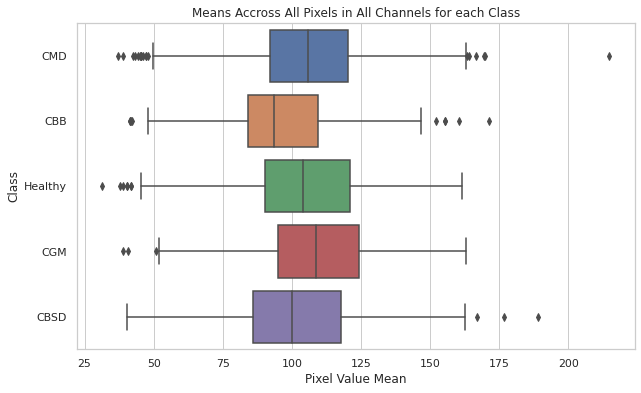

In [ ]:
plt.figure(figsize=(10,6))
ax = sns.boxplot(data=metadata, y='label', x='image_mean', orient="h")
ax.set_title('Means Accross All Pixels in All Channels for each Class')
ax.set_xlabel('Pixel Value Mean')
ax.set_ylabel('Class')

## Plot 7: Boxplot of pixel value st. dev. *over all training images*

Text(0, 0.5, 'Class')

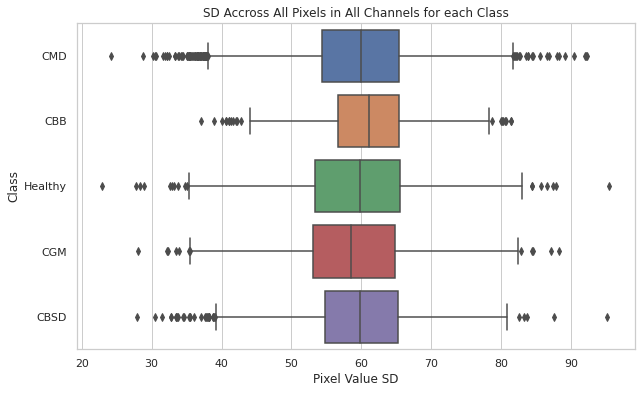

In [ ]:
plt.figure(figsize=(10,6))
ax = sns.boxplot(data=metadata, y='label', x='image_sd', orient="h")
ax.set_title('SD Accross All Pixels in All Channels for each Class')
ax.set_xlabel('Pixel Value SD')
ax.set_ylabel('Class')

## Plot 8: Skewness Pixel Boxplot (over all images)

Text(0, 0.5, 'Class')

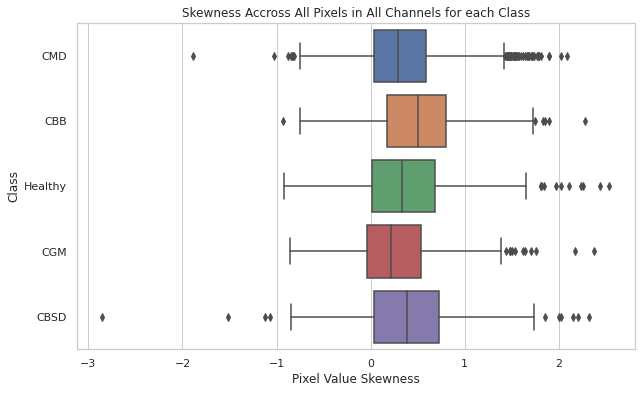

In [ ]:
plt.figure(figsize=(10,6))
ax = sns.boxplot(data=metadata, y='label', x='image_skewness', orient="h")
ax.set_title('Skewness Accross All Pixels in All Channels for each Class')
ax.set_xlabel('Pixel Value Skewness')
ax.set_ylabel('Class')

## Plot 9: Red Channel Mean Boxplot

Text(0, 0.5, 'Class')

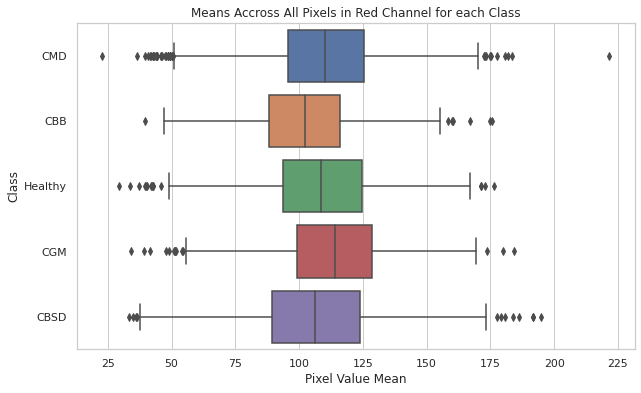

In [ ]:
plt.figure(figsize=(10,6))
ax = sns.boxplot(data=metadata, y='label', x='mean_red_value', orient="h")
ax.set_title('Means Accross All Pixels in Red Channel for each Class')
ax.set_xlabel('Pixel Value Mean')
ax.set_ylabel('Class')

## Plot 10: Green Channel Mean Boxplot

Text(0, 0.5, 'Class')

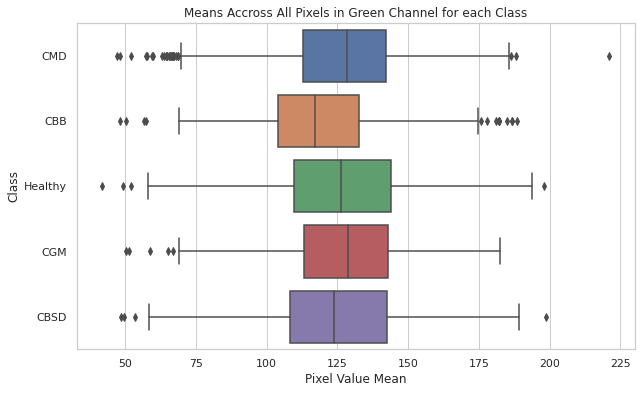

In [ ]:
plt.figure(figsize=(10,6))
ax = sns.boxplot(data=metadata, y='label', x='mean_green_value', orient="h")
ax.set_title('Means Accross All Pixels in Green Channel for each Class')
ax.set_xlabel('Pixel Value Mean')
ax.set_ylabel('Class')

## Plot 11: Blue Channel Mean Boxplot

Text(0, 0.5, 'Class')

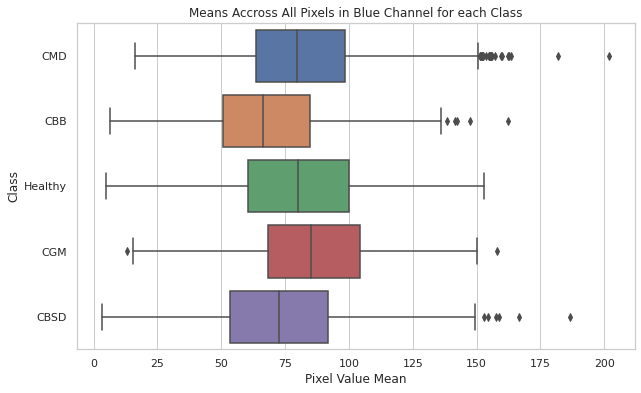

In [ ]:
plt.figure(figsize=(10,6))
ax = sns.boxplot(data=metadata, y='label', x='mean_blue_value', orient="h")
ax.set_title('Means Accross All Pixels in Blue Channel for each Class')
ax.set_xlabel('Pixel Value Mean')
ax.set_ylabel('Class')